# Data clean
### Import of necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load of dataset

In [2]:
water_potability_df = pd.read_csv('../../water_potability_ds.csv')
water_potability_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Check the amount of nulls

In [3]:
nulls_serie = water_potability_df.isnull().sum()
print(nulls_serie)
dataset_rows = water_potability_df.shape[0]
print(f'\nDataset rows: {dataset_rows}')
nulls_quantity = nulls_serie.sum()
print(f'Total null values: {nulls_quantity} ({round(nulls_quantity/dataset_rows,2)*100}%)')

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Dataset rows: 3276
Total null values: 1434 (44.0%)


Here we can see that we have more than one thousand nulls. We cannot delete them because it is the 44% of our entire dataset, so we will have to impute data.
### Check the distributions
We will check the distribution of each column with missing values to determine if it is a clever idea to impute the data using a specific distribution.

In [4]:
def show_dist(df, column_name, df_compare = pd.DataFrame()):
  if not df_compare.empty:
    plt.hist(df_compare[column_name], alpha = 0.5, label='Imputed data dataframe')
  plt.hist(df[column_name], alpha = 0.5, label='Base dataframe')
  plt.title(f'Distribution of {column_name}')
  plt.ylabel('Frequency')
  plt.xlabel('Value')
  plt.legend()
  plt.show()

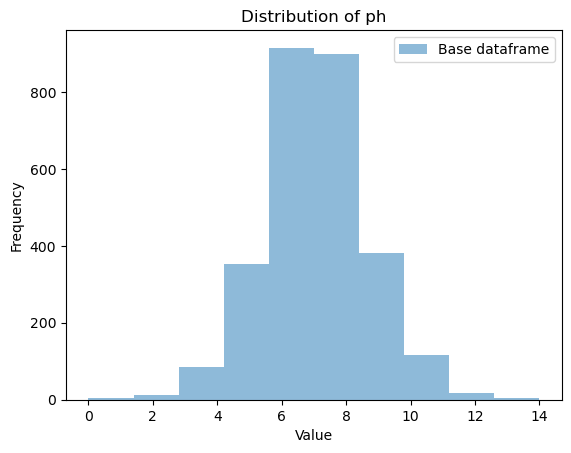

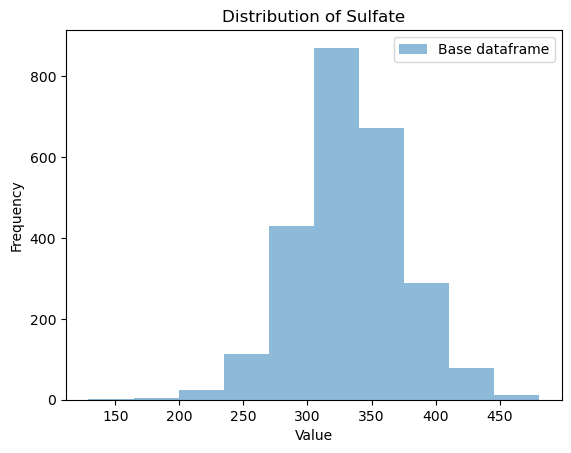

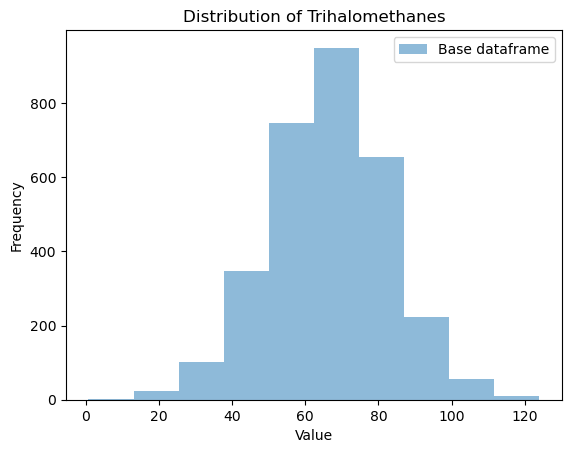

In [5]:
show_dist(water_potability_df,'ph')
show_dist(water_potability_df,'Sulfate')
show_dist(water_potability_df,'Trihalomethanes')

### Data imputation - Normal distribution
As we saw before, all the columns seem to use a normal distribution, of course, some of them are sightly to the left but we think that it will not be a problem.


In [6]:
def impute_data(column, missing_values):
  mean = column.mean()
  sigma = column.std()
  generated_data = np.random.normal(mean, sigma, missing_values)
  column[column.isna()] = generated_data

In [7]:
water_potability_df_imputed = water_potability_df.copy()

impute_data(water_potability_df_imputed['ph'], nulls_serie['ph'])
impute_data(water_potability_df_imputed['Sulfate'], nulls_serie['Sulfate'])
impute_data(water_potability_df_imputed['Trihalomethanes'], nulls_serie['Trihalomethanes'])

C:\Users\Y540\AppData\Local\Temp\ipykernel_20576\3700037966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isna()] = generated_data
C:\Users\Y540\AppData\Local\Temp\ipykernel_20576\3700037966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isna()] = generated_data
C:\Users\Y540\AppData\Local\Temp\ipykernel_20576\3700037966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isna()] = g

In [8]:
water_potability_df_imputed.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

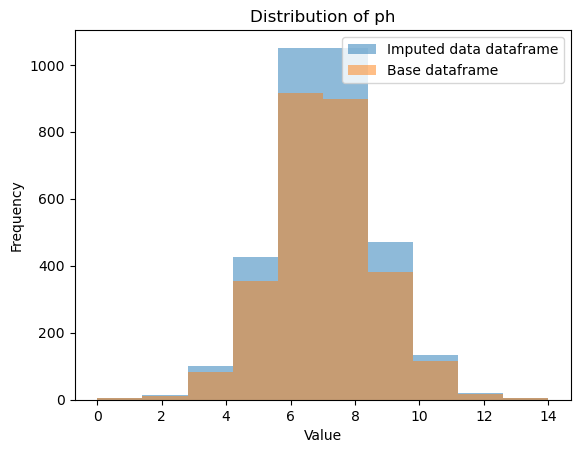

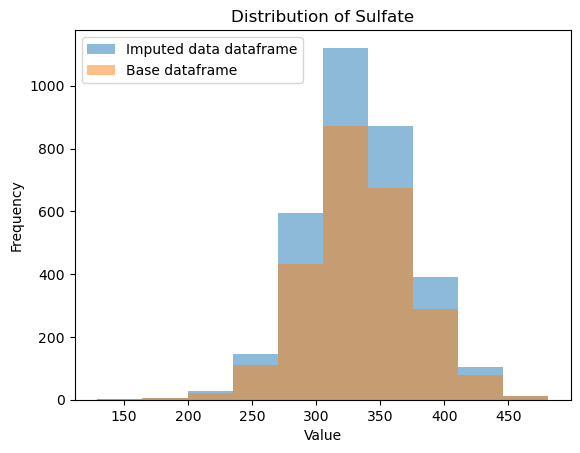

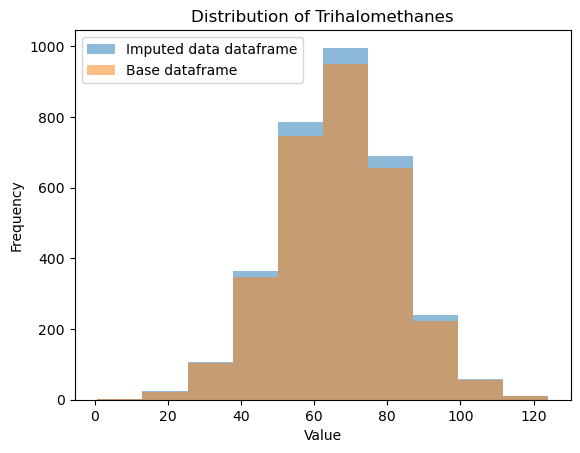

In [9]:
show_dist(water_potability_df,'ph',water_potability_df_imputed)
show_dist(water_potability_df,'Sulfate',water_potability_df_imputed)
show_dist(water_potability_df,'Trihalomethanes',water_potability_df_imputed)

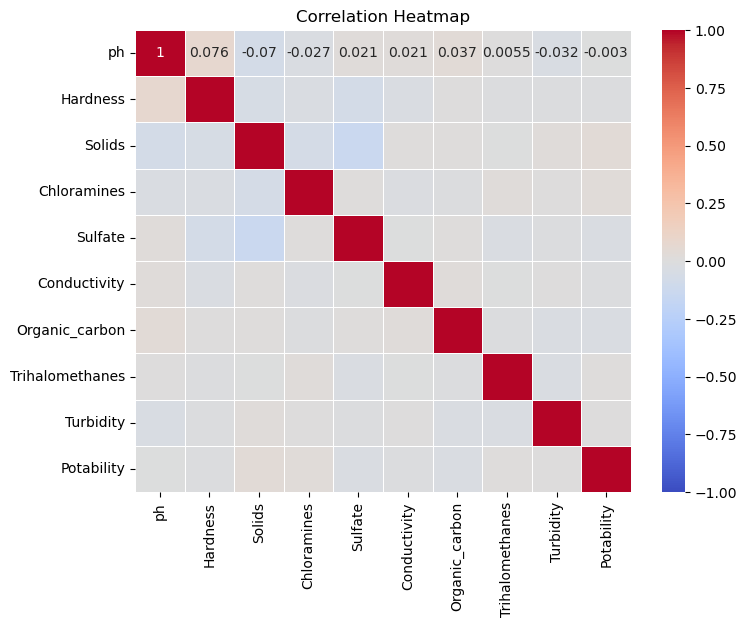

In [10]:
# Calculate the correlation matrix
correlation_matrix = water_potability_df_imputed.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
water_potability_df_imputed.to_csv('../../water-potability-clean.csv')